In [13]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from operator import itemgetter
from itertools import permutations, product
matplotlib.rcParams["figure.dpi"] = 120

In [49]:
def get_cycles(n):
    cycles = []
    for perm in permutations(range(1, n)):
        cycles.append((0,) + perm)
    return cycles
def to_str(l):
    return ''.join(str(a) for a in l)
def list_to_str(L):
    return [to_str(l) for l in L]
    
def get_special_cycles(n, m):
    perm_items = list(product(range(n), range(m)))
    # print(perm_items)
    index_cycles = get_cycles(n*m)
    # print('got all cycles')
    # print(index_cycles)
    cycles = [tuple(to_str(perm_items[index_cycle[i]]) for i in range(n*m)) for index_cycle in index_cycles]
    special_cycles = []
    # print(cycles)
    for cycle in cycles:
        if cycle[-1][1]=='0':
            # print(cycle)
            special_cycles.append(cycle)
    assignment = cycle_sort(special_cycles)
    # print('returning special cycles')
    return special_cycles, assignment

def cycle_map(cycles):
    # n = len(cycles[0])
    preimage_dict = {}
    for cycle in cycles:
        val = cycle[-1][0]
        if val not in preimage_dict:
            preimage_dict[val] = [cycle]
        else:
            preimage_dict[val].append(cycle)
    return preimage_dict
    
def cycle_sort(cycles):
    cycles.sort(key=itemgetter(-1))
    return {cycles[i]: i for i in range(len(cycles))}

def shift(cycle, l, k):
    cycle2 = cycle[:k+1] + cycle[l+1:] + cycle[k+1:l+1]
    return cycle2
def cycle_mat_l(cycles, assignment, i):
    mat = np.zeros((len(cycles), len(cycles)))
    for cycle in cycles:
        # print('cycle?', cycle)
        # print(cycle[i])
        if cycle[i][1] == '0':
            # print('cycle', cycle)
            cyclei = assignment[cycle]
            for k in range(i):
                cycle2 = shift(cycle, i, k)
                cycle2i = assignment[cycle2] 
                # print(cycle2)
                mat[cyclei, cycle2i] = 1
                # mat[cycle2i, cyclei] = 1
                mat[cyclei, cyclei] = 2
                # mat[cycle2i, cycle2i] = 2

    return mat

def cycle_mat_k(cycles, k):
    mat = np.zeros((len(cycles), len(cycles)))
    for cycle in cycles:
        for l in range(k+1, len(cycles[0])-1):
            # print(l)
            if cycle[l][1] == '0':
                cycle2 = shift(cycle, l, k)
                mat[cycles.index(cycle), cycles.index(cycle2)] = 1
    return mat

# print(special_cycles)
# # print(assignment)
# mat = 0*cycle_mat_l(special_cycles, 1)
# for i in range(1, n*m-1):
#     mat = mat + cycle_mat_l(special_cycles, i)
# plt.imshow(mat)
# # plt.imshow(mat-mat.T)

In [50]:
n=3
m=2
special_cycles, assignment = get_special_cycles(n,m)
# print(special_cycles)
# assignment = cycle_map(special_cycles)
# print(special_cycles)
# print(assignment)

In [51]:
# k_mats = [cycle_mat_k(special_cycles, k) for k in range(n*m-2)]
# k_sum = np.sum(k_mats, 0)
l_mats = [cycle_mat_l(special_cycles, assignment, l) for l in range(1, n*m-1)]
l_sum = np.sum(l_mats, 0)

0
0.0


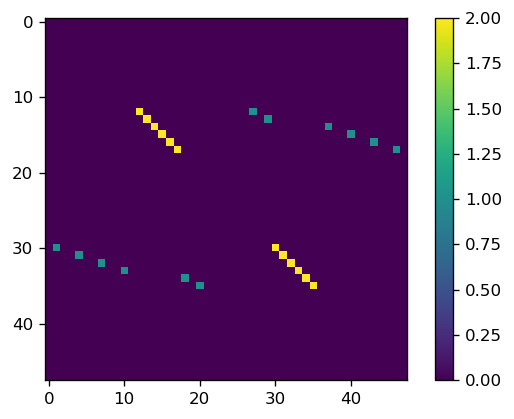

1
0.0


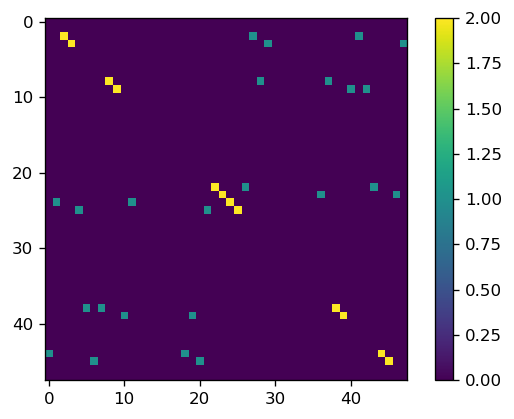

2
0.0


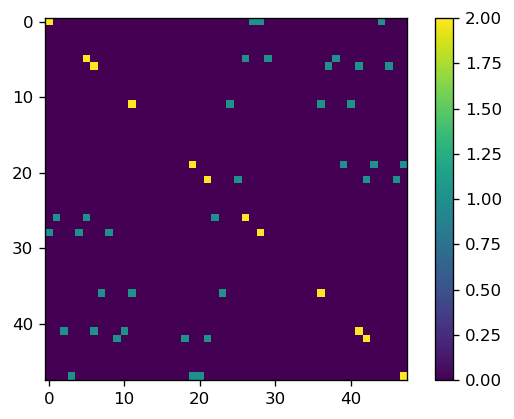

3
0.0


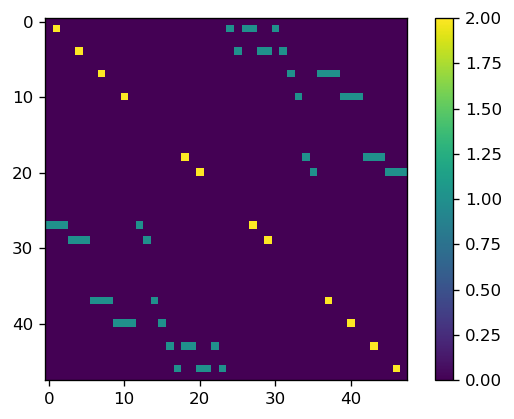

In [52]:
# plt.imshow(k_sum)
# plt.show()
for l in range(len(l_mats)):
    print(l)
    print(np.min(np.linalg.eigvals(l_mats[l])))
    plt.imshow(l_mats[l])
    plt.colorbar()
    plt.show()

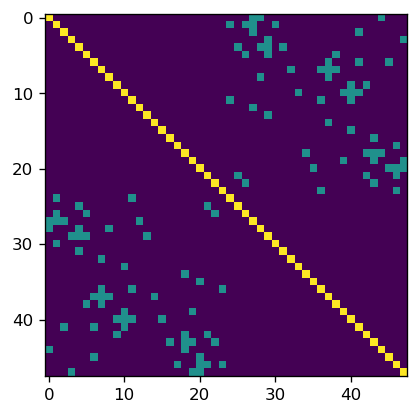

-0.879385241571816

In [40]:
plt.imshow(l_sum)
plt.show()
np.min(np.linalg.eigvals(l_sum))

In [53]:
np.max(np.linalg.eigvals(l_sum))

4.879385241571814